In [13]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab3')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# загрузка датасета
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split


# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 50000,
                                                    random_state = 7)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


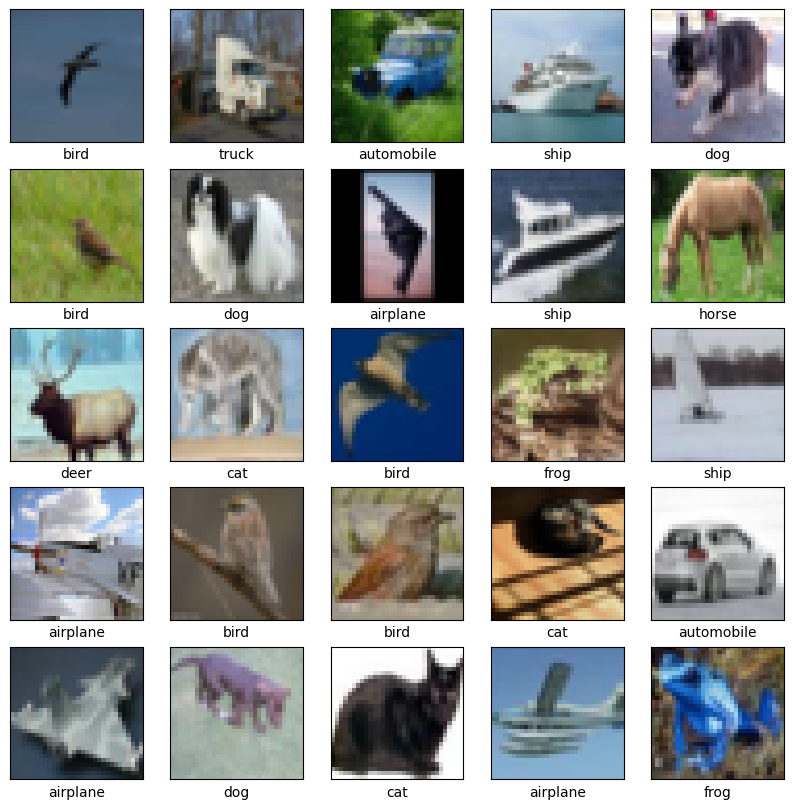

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(X_train[i])
 plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [21]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (32, 32, 3)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


In [32]:
# создаем модель
model = Sequential()

# Блок 1
model.add(layers.Conv2D(32, (3, 3), padding="same",
                        activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 2
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,042 (2.26 MB)

 Trainable params: 591,658 (2.26 MB)

 Non-trainable params: 384 (1.50 KB)

In [33]:
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2869 - loss: 2.0611 - val_accuracy: 0.4912 - val_loss: 1.3440
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4823 - loss: 1.4245 - val_accuracy: 0.5306 - val_loss: 1.3164
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5579 - loss: 1.2440 - val_accuracy: 0.6416 - val_loss: 0.9811
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6049 - loss: 1.1170 - val_accuracy: 0.6588 - val_loss: 0.9544
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6420 - loss: 1.0236 - val_accuracy: 0.7096 - val_loss: 0.8580
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6799 - loss: 0.9205 - val_accuracy: 0.6866 - val_loss: 0.9137
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6960 - loss: 0.8744 - val_accuracy: 0.7164 - val_loss: 0.7933
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7182 - loss: 0.8150 - val_accuracy: 

In [34]:
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8182 - loss: 0.6295
Loss on test data: 0.635892927646637
Accuracy on test data: 0.8194000124931335


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
NN output: [[0.19707698 0.12492625 0.35796925 0.08262431 0.0519276  0.01125633
  0.04046627 0.03933177 0.03143692 0.0629843 ]]


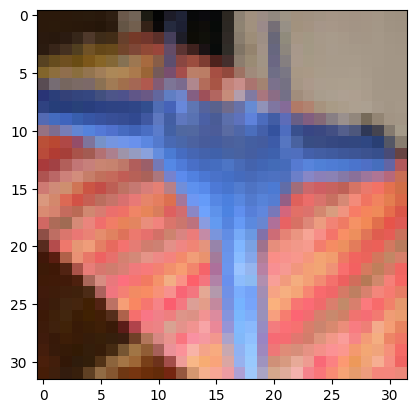

Real mark:  0
NN answer:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
NN output: [[6.0066624e-05 5.0396560e-05 4.3396626e-02 7.0300132e-02 1.8314796e-03
  8.7599868e-01 8.3906803e-04 7.5012995e-03 1.6654752e-05 5.6444887e-06]]


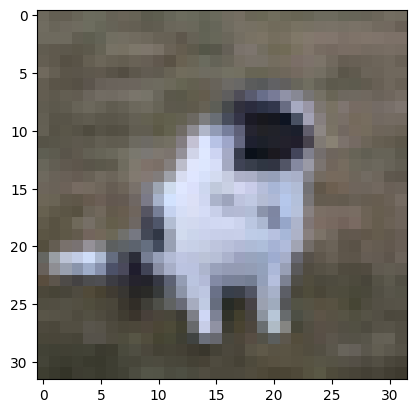

Real mark:  5
NN answer:  5


In [41]:
for n in [5,17]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.85      0.86      0.86      1013
  automobile       0.93      0.91      0.92       989
        bird       0.75      0.75      0.75      1018
         cat       0.69      0.66      0.67      1049
        deer       0.79      0.78      0.78      1009
         dog       0.73      0.68      0.71       978
        frog       0.79      0.90      0.84       981
       horse       0.88      0.84      0.86       986
        ship       0.89      0.92      0.91      1029
       truck       0.88      0.91      0.89       948

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



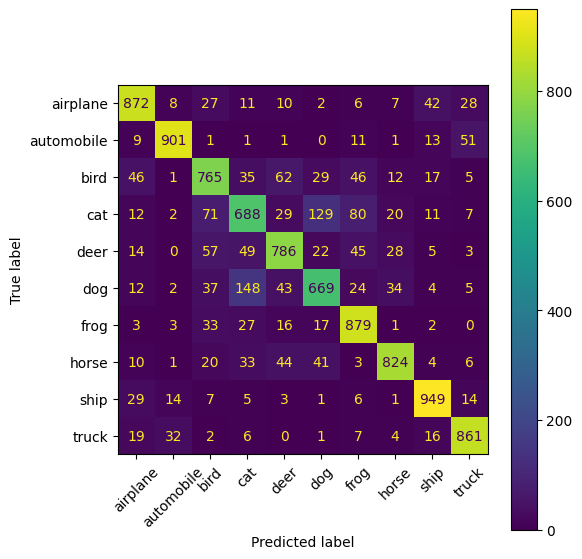

In [42]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=45)  # поворот подписей по X и приятная палитра
plt.tight_layout()  # чтобы всё влезло
plt.show()